# myAOAnet

In [1]:
import os
from os.path import join
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, accuracy_score
%matplotlib inline

In [2]:
data_dir = 'data_0506'
aoa_dict = {}
#fields_lst = ['field.data0', 'field.data1', 'field.data2', 'field.data3', 'field.data5', 'field.data6', 'field.data7', 'field.data10', 'field.data11', 'field.data15']
fields_lst = ['field.data0', 'field.data1', 'field.data2', 'field.data3', 'field.data4', 'field.data5', 'field.data6', 'field.data7', \
              'field.data10', 'field.data11', 'field.data12', 'field.data13', 'field.data14', 'field.data15', \
              'field.data20', 'field.data21', 'field.data22', 'field.data23', \
              'field.data30', 'field.data31']

for filename in os.listdir(data_dir):
    if filename.startswith("deg_m") and filename.endswith(".csv"):
        aoa = pd.read_csv(join(data_dir, filename), sep=',', header=0)
        aoa_Rjk = aoa[fields_lst]
        aoa_dict[- float(filename[5:-4])] = aoa_Rjk
    elif filename.startswith("deg_") and filename.endswith(".csv"):
        aoa = pd.read_csv(join(data_dir, filename), sep=',', header=0)
        aoa_Rjk = aoa[fields_lst]
        aoa_dict[float(filename[4:-4])] = aoa_Rjk

In [3]:
num_fields = aoa_dict[0].shape[1]
aoa_dict[-70].head(50)

,field.data0,field.data1,field.data2,field.data3,field.data4,field.data5,field.data6,field.data7,field.data10,field.data11,field.data12,field.data13,field.data14,field.data15,field.data20,field.data21,field.data22,field.data23,field.data30,field.data31
0,7.499327e-08,0.0,-8.864431e-09,-1.088807e-08,-1.442170e-08,-2.251837e-08,2.529164e-09,-1.808796e-08,0.000006,0.0,2.613764e-07,-5.849040e-08,1.989409e-07,1.193405e-07,0.000004,0.0,2.686698e-07,1.309229e-07,0.000004,0.0
1,7.539852e-08,0.0,-4.253591e-10,-1.315213e-08,-1.498116e-08,-2.452329e-08,-8.916057e-11,-1.910802e-08,0.000006,0.0,2.584998e-07,2.109510e-08,2.225710e-07,5.112715e-08,0.000004,0.0,2.646571e-07,1.360576e-07,0.000004,0.0
2,7.609084e-08,0.0,-4.222034e-09,-1.330833e-08,-1.103198e-08,-2.259569e-08,-5.790104e-09,-1.377851e-08,0.000006,0.0,2.298786e-07,-5.523723e-08,1.537900e-07,7.509499e-08,0.000004,0.0,2.990005e-07,1.275286e-07,0.000004,0.0
3,3.166152e-03,0.0,2.782658e-02,-2.924249e-02,-3.323002e-02,-6.484006e-03,8.931310e-03,2.976050e-02,0.521057,0.0,-2.299654e-01,-3.634756e-01,-1.961365e-01,3.440582e-01,0.365465,0.0,-1.544749e-01,-2.942758e-01,0.305172,0.0
4,2.445301e-03,0.0,1.797160e-02,-2.994214e-02,-2.954013e-02,-2.607111e-03,9.348851e-03,2.573287e-02,0.505407,0.0,-1.835960e-01,-3.817890e-01,-2.469689e-01,3.036000e-01,0.363644,0.0,-1.399307e-01,-3.019182e-01,0.307764,0.0
5,1.083993e-03,0.0,1.424532e-02,-1.780085e-02,-1.896935e-02,-3.977779e-03,-2.679133e-03,1.905900e-02,0.508018,0.0,-1.891950e-01,-3.797745e-01,-3.659056e-01,2.144856e-01,0.363486,0.0,-2.393123e-02,-3.610810e-01,0.361207,0.0
6,4.358727e-03,0.0,1.049117e-02,-3.727712e-02,-3.848245e-02,6.855840e-03,2.431761e-02,3.040243e-02,0.369752,0.0,-1.565190e-01,-3.269958e-01,-2.120795e-01,2.873846e-01,0.364567,0.0,-1.664175e-01,-3.154764e-01,0.356154,0.0
7,7.616202e-08,0.0,-3.738724e-09,-6.414935e-09,-1.331932e-08,-1.924453e-08,3.077964e-09,-2.236021e-08,0.000006,0.0,2.303717e-07,-7.206260e-09,1.712313e-07,5.505763e-08,0.000004,0.0,2.369079e-07,1.389938e-07,0.000004,0.0
8,7.565184e-08,0.0,-4.520472e-09,-1.214006e-08,-1.659666e-08,-1.984396e-08,-1.415223e-11,-1.802397e-08,0.000006,0.0,3.142911e-07,-3.948926e-08,2.082230e-07,6.358336e-08,0.000004,0.0,2.391808e-07,1.539091e-07,0.000004,0.0
9,7.605680e-08,0.0,-3.373158e-09,-9.251934e-09,-1.514406e-08,-1.609681e-08,1.939657e-09,-1.943166e-08,0.000006,0.0,2.820634e-07,-4.701227e-08,2.199376e-07,7.485291e-08,0.000004,0.0,2.665067e-07,1.287611e-07,0.000004,0.0


In [4]:
#Degree to Radian
for key in aoa_dict.keys():
    aoa_dict[key]['theta'] = key * math.pi / 180

# Show detection of LoRa beacon when Rjk is significant
field_thres = 1e-04
aoa_dict[-70][abs(aoa_dict[-70]['field.data2']) > field_thres]

/home/zdai/anaconda3/envs/DLpy37/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,field.data0,field.data1,field.data2,field.data3,field.data4,field.data5,field.data6,field.data7,field.data10,field.data11,...,field.data13,field.data14,field.data15,field.data20,field.data21,field.data22,field.data23,field.data30,field.data31,theta
3,0.003166,0.0,0.027827,-0.029242,-0.033230,-0.006484,0.008931,0.029761,0.521057,0.0,...,-0.363476,-0.196136,0.344058,0.365465,0.0,-0.154475,-0.294276,0.305172,0.0,-1.22173
4,0.002445,0.0,0.017972,-0.029942,-0.029540,-0.002607,0.009349,0.025733,0.505407,0.0,...,-0.381789,-0.246969,0.303600,0.363644,0.0,-0.139931,-0.301918,0.307764,0.0,-1.22173
5,0.001084,0.0,0.014245,-0.017801,-0.018969,-0.003978,-0.002679,0.019059,0.508018,0.0,...,-0.379774,-0.365906,0.214486,0.363486,0.0,-0.023931,-0.361081,0.361207,0.0,-1.22173
6,0.004359,0.0,0.010491,-0.037277,-0.038482,0.006856,0.024318,0.030402,0.369752,0.0,...,-0.326996,-0.212079,0.287385,0.364567,0.0,-0.166417,-0.315476,0.356154,0.0,-1.22173
15,0.001550,0.0,0.019132,-0.020527,-0.023260,-0.004288,0.000235,0.023405,0.514613,0.0,...,-0.360526,-0.306252,0.290925,0.364556,0.0,-0.067639,-0.352640,0.355055,0.0,-1.22173
16,0.001401,0.0,0.017850,-0.019777,-0.022363,-0.002578,0.001990,0.022163,0.512862,0.0,...,-0.347822,-0.286625,0.309733,0.365507,0.0,-0.071952,-0.352284,0.355208,0.0,-1.22173
17,0.001428,0.0,0.018209,-0.019405,-0.022628,-0.001259,0.003847,0.021794,0.501992,0.0,...,-0.322502,-0.246339,0.329828,0.363251,0.0,-0.079663,-0.343577,0.344188,0.0,-1.22173
18,0.001116,0.0,0.014003,-0.014172,-0.017053,-0.001165,0.002553,0.016512,0.359584,0.0,...,-0.230392,-0.177101,0.239357,0.264499,0.0,-0.055841,-0.250865,0.251022,0.0,-1.22173
27,0.003585,0.0,0.025769,-0.026502,-0.035899,0.000855,0.011890,0.032150,0.384255,0.0,...,-0.259122,-0.152122,0.319069,0.363075,0.0,-0.110860,-0.325551,0.328303,0.0,-1.22173
28,0.003811,0.0,0.026975,-0.027181,-0.036971,0.001849,0.014068,0.031941,0.387974,0.0,...,-0.250472,-0.128189,0.326467,0.362947,0.0,-0.120506,-0.317198,0.319981,0.0,-1.22173


In [5]:
# Differentiate R of LoRa signal or noise
aoa_sig, aoa_noi = {}, {}
for key in aoa_dict.keys():
    aoa_sig[key] = aoa_dict[key].drop(aoa_dict[key][abs(aoa_dict[key]['field.data2']) < field_thres].index)
    aoa_noi[key] = aoa_dict[key].drop(aoa_dict[key][abs(aoa_dict[key]['field.data2']) >= field_thres].index)
    
#aoa_sig[-70]

In [6]:
# Xaoa = aoa_sig <-> theta[Rad]
Xaoa = pd.concat([aoa_sig[rad] for rad in range(-70, 80, 10)], keys=[rad for rad in range(-70, 80, 10)], names=['Series name', 'Row ID'])
idx = pd.IndexSlice

In [7]:
Xaoa.loc[idx[[0, 10], :], :]
Xaoa.loc[-70]

,field.data0,field.data1,field.data2,field.data3,field.data4,field.data5,field.data6,field.data7,field.data10,field.data11,...,field.data13,field.data14,field.data15,field.data20,field.data21,field.data22,field.data23,field.data30,field.data31,theta
Row ID,,,,,,,,,,,,,,,,,,,,,
3,0.003166,0.0,0.027827,-0.029242,-0.033230,-0.006484,0.008931,0.029761,0.521057,0.0,...,-0.363476,-0.196136,0.344058,0.365465,0.0,-0.154475,-0.294276,0.305172,0.0,-1.22173
4,0.002445,0.0,0.017972,-0.029942,-0.029540,-0.002607,0.009349,0.025733,0.505407,0.0,...,-0.381789,-0.246969,0.303600,0.363644,0.0,-0.139931,-0.301918,0.307764,0.0,-1.22173
5,0.001084,0.0,0.014245,-0.017801,-0.018969,-0.003978,-0.002679,0.019059,0.508018,0.0,...,-0.379774,-0.365906,0.214486,0.363486,0.0,-0.023931,-0.361081,0.361207,0.0,-1.22173
6,0.004359,0.0,0.010491,-0.037277,-0.038482,0.006856,0.024318,0.030402,0.369752,0.0,...,-0.326996,-0.212079,0.287385,0.364567,0.0,-0.166417,-0.315476,0.356154,0.0,-1.22173
15,0.001550,0.0,0.019132,-0.020527,-0.023260,-0.004288,0.000235,0.023405,0.514613,0.0,...,-0.360526,-0.306252,0.290925,0.364556,0.0,-0.067639,-0.352640,0.355055,0.0,-1.22173
16,0.001401,0.0,0.017850,-0.019777,-0.022363,-0.002578,0.001990,0.022163,0.512862,0.0,...,-0.347822,-0.286625,0.309733,0.365507,0.0,-0.071952,-0.352284,0.355208,0.0,-1.22173
17,0.001428,0.0,0.018209,-0.019405,-0.022628,-0.001259,0.003847,0.021794,0.501992,0.0,...,-0.322502,-0.246339,0.329828,0.363251,0.0,-0.079663,-0.343577,0.344188,0.0,-1.22173
18,0.001116,0.0,0.014003,-0.014172,-0.017053,-0.001165,0.002553,0.016512,0.359584,0.0,...,-0.230392,-0.177101,0.239357,0.264499,0.0,-0.055841,-0.250865,0.251022,0.0,-1.22173
27,0.003585,0.0,0.025769,-0.026502,-0.035899,0.000855,0.011890,0.032150,0.384255,0.0,...,-0.259122,-0.152122,0.319069,0.363075,0.0,-0.110860,-0.325551,0.328303,0.0,-1.22173


## Preparation

In [8]:
# Xarr: time series of Rjk
Xarr, ylst = np.empty((0, 3, 20), dtype='float32'), []
rowt_0, rowt_1, rowt_2 = None, None, None
row_up, row_mid, row_down = -1, -1, -1

for serName in range(-70, 80, 10):
    isFirstRow = True
    isSecRow = True
    for rowId, row in Xaoa.loc[serName].iterrows():
        row_up = row_mid
        rowt_2 = rowt_1
        row_mid = row_down
        rowt_1 = rowt_0
        row_down = rowId
        rowt_0 = row.drop('theta').to_numpy(dtype='float32').reshape(1, 1, 20)
        if isFirstRow:
            isFirstRow = False
            continue
        
        if isSecRow:
            isSecRow = False
            continue
        
        if row_down-row_mid==1 and row_mid-row_up==1:
            arr_tmp = np.concatenate((rowt_2, rowt_1, rowt_0), axis=1)
            
            Xarr = np.append(Xarr, arr_tmp, axis=0)
            ylst.append(row['theta'])
            
print(Xarr.shape, len(ylst))

(2303, 3, 20) 2303


In [70]:
# Xvec: slice of a Rjk row
Xvec = Xaoa.drop('theta', axis=1).to_numpy()
yvec = Xaoa['theta'].to_numpy()
yvec.shape

(3051,)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(Xarr, ylst, test_size=0.2, random_state=42)

In [10]:
X_train.shape

(1842, 3, 20)

In [11]:
# Normalization
mmsc = MinMaxScaler()
mmsc.fit(X_train.reshape(-1, X_train.shape[-1]))
X_train_std = mmsc.transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test_std = mmsc.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

In [12]:
ymax = max(y_train)
ymin = min(y_train)
y_train_std = (y_train - ymin)/(ymax-ymin)
y_test_std = (y_test - ymin)/(ymax-ymin)

In [13]:
len(y_test)

461

## Training
### LSTM

In [14]:
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, add, LSTM, RepeatVector, TimeDistributed
from keras.layers.core import Layer, Dense, Dropout, Activation, Flatten, Reshape
from keras import regularizers, Sequential
from keras.regularizers import l2
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from keras.utils import np_utils, plot_model

Using TensorFlow backend.
/home/zdai/anaconda3/envs/DLpy37/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/zdai/anaconda3/envs/DLpy37/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/zdai/anaconda3/envs/DLpy37/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/zdai/anaconda3/envs/

In [15]:
time_steps = 3
feature_dim = 20

# define model
x = Input(shape=(time_steps, feature_dim))
h1 = LSTM(128, activation='relu', return_sequences=True)(x)
h2 = LSTM(64, activation='relu')(h1)
h3 = Dense(9, activation='relu')(h2)
r = Dense(1, activation='sigmoid')(h3)

model = Model(inputs=x, outputs=r)
model.compile(optimizer='adam', loss='mse')
model.summary()





_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3, 20)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 3, 128)            76288     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 585       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 10        
Total params: 126,291
Trainable params: 126,291
Non-trainable params: 0
_________________________________________________________________


In [16]:
epochs = 10
batch_size = 100

history = model.fit(X_train_std, y_train_std, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test_std, y_test_std))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 1842 samples, validate on 461 samples
Epoch 1/10
1842/1842 [==============================] - 2s 1ms/step - loss: 0.0709 - val_loss: 0.0585
Epoch 2/10
1842/1842 [==============================] - 0s 137us/step - loss: 0.0379 - val_loss: 0.0114
Epoch 3/10
1842/1842 [==============================] - 0s 142us/step - loss: 0.0093 - val_loss: 0.0049
Epoch 4/10
1842/1842 [==============================] - 0s 142us/step - loss: 0.0050 - val_loss: 0.0037
Epoch 5/10
1842/1842 [==============================] - 0s 148us/step - loss: 0.0040 - val_loss: 0.0027
Epoch 6/10
1842/1842 [==============================] - 0s 152us/step - loss: 0.0030 - val_loss: 0.0020
Epoch 7/10
1842/1842 [==============================] - 0s 141us/step - loss: 0.0021 - val_loss: 0.0013
Epoch 8/10
1842/1842 [==============================] - 0s 149us/step - loss: 0.0014 - val_loss: 0.0010
Epoch 9/10
1842/1842 [=====

dict_keys(['val_loss', 'loss'])


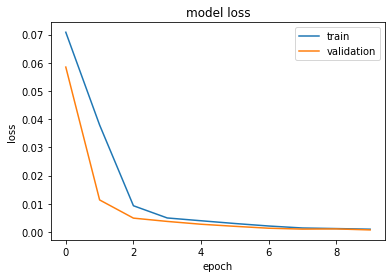

In [17]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [18]:
pred_y_test_std = model.predict(X_test_std)
pred_y_test = pred_y_test_std*(ymax-ymin) + ymin
pred_y_test_std.shape

(461, 1)

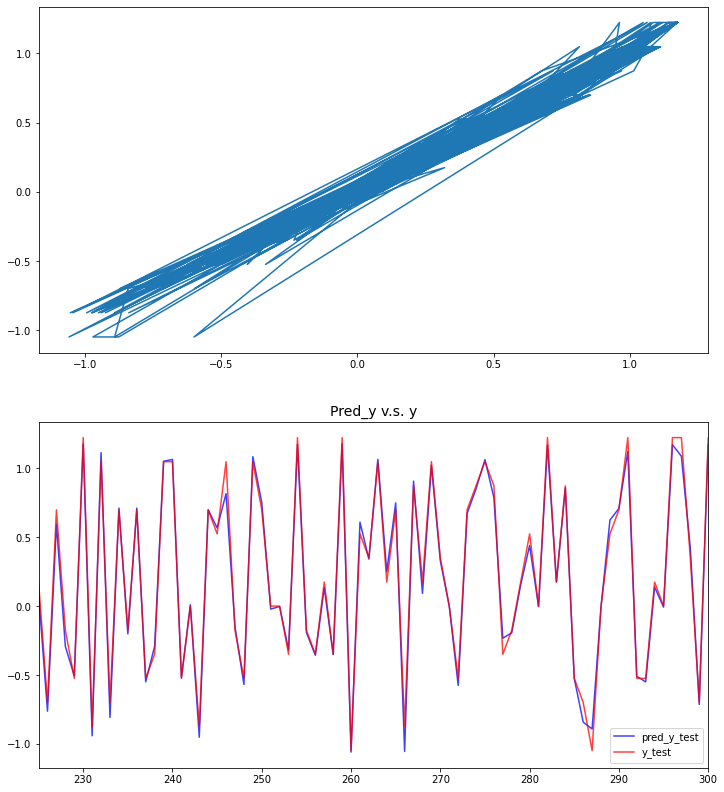

In [23]:
fig ,ax_lst = plt.subplots(2, 1,figsize=(12,14))
ax_lst[0].plot(pred_y_test, y_test)
ax_lst[1].plot([i for i in range(pred_y_test.shape[0])], list(pred_y_test), color='b', alpha=0.75, label='pred_y_test')
ax_lst[1].plot(y_test, color='red', alpha=0.75, label='y_test')
ax_lst[1].set_title(f"Pred_y v.s. y",fontsize=14)
ax_lst[1].grid(False)
ax_lst[1].legend(loc='best')
ax_lst[1].set_xlim([225, 300])
plt.show()

In [24]:
print("RMSE of myAOAnet: ",np.sqrt(mean_squared_error(y_test, pred_y_test)))

RMSE of myAOAnet:  0.0657574280711066


### LSTM-Autoencoder

In [27]:
time_steps = 3
feature_dim = 20

x0 = Input(shape=(time_steps, feature_dim))
l1 = LSTM(128, activation='relu', return_sequences=True)(x0)
l2 = LSTM(64, activation='relu', return_sequences=False)(l1)
h0 = RepeatVector(time_steps)(l2)
l3 = LSTM(64, activation='relu', return_sequences=True)(h0)
l4 = LSTM(128, activation='relu', return_sequences=True)(l3)
r0 = TimeDistributed(Dense(feature_dim))(l4)

LSTM_AE = Model(inputs=x0, outputs=r0)
LSTM_AE.compile(optimizer='adam', loss='mse')
LSTM_AE.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3, 20)             0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 3, 128)            76288     
_________________________________________________________________
lstm_10 (LSTM)               (None, 64)                49408     
_________________________________________________________________
repeat_vector_2 (RepeatVecto (None, 3, 64)             0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 3, 64)             33024     
_________________________________________________________________
lstm_12 (LSTM)               (None, 3, 128)            98816     
_________________________________________________________________
time_distributed_2 (TimeDist (None, 3, 20)             2580      
Total para

In [28]:
epochs=20
batch_size = 50

LSTM_AE.fit(X_train_std, X_train_std, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(X_test_std, X_test_std))

Train on 1842 samples, validate on 461 samples
Epoch 1/20
1842/1842 [==============================] - 5s 3ms/step - loss: 0.2334 - val_loss: 0.1311
Epoch 2/20
1842/1842 [==============================] - 1s 478us/step - loss: 0.1054 - val_loss: 0.0825
Epoch 3/20
1842/1842 [==============================] - 1s 512us/step - loss: 0.0631 - val_loss: 0.0536
Epoch 4/20
1842/1842 [==============================] - 1s 474us/step - loss: 0.0512 - val_loss: 0.0416
Epoch 5/20
1842/1842 [==============================] - 1s 476us/step - loss: 0.0328 - val_loss: 0.0238
Epoch 6/20
1842/1842 [==============================] - 1s 537us/step - loss: 0.0200 - val_loss: 0.0159
Epoch 7/20
1842/1842 [==============================] - 1s 499us/step - loss: 0.0137 - val_loss: 0.0119
Epoch 8/20
1842/1842 [==============================] - 1s 486us/step - loss: 0.0103 - val_loss: 0.0084
Epoch 9/20
1842/1842 [==============================] - 1s 550us/step - loss: 0.0076 - val_loss: 0.0068
Epoch 10/20
1842/18

In [29]:
pred_X_test_std = LSTM_AE.predict(X_test_std, verbose=0)
print('---Predicted---')
print(np.round(pred_X_test_std, 4))
print('---Actual---')
print(np.round(X_test_std, 4))

---Predicted---
[[[ 8.2760e-01  2.5000e-03  7.4330e-01 ...  6.9140e-01  8.8460e-01
    2.0700e-02]
  [ 8.2810e-01  1.8000e-03  7.3460e-01 ...  6.9240e-01  9.3980e-01
   -8.1000e-03]
  [ 7.8360e-01  1.0800e-02  7.0950e-01 ...  6.9780e-01  8.9750e-01
   -1.4700e-02]]

 [[ 9.4120e-01 -1.3300e-02  7.4000e-03 ...  5.1460e-01  9.7550e-01
   -2.5000e-03]
  [ 9.7090e-01 -1.3400e-02  8.5000e-03 ...  5.1430e-01  1.0104e+00
   -7.8000e-03]
  [ 9.7090e-01 -2.0000e-04  1.0600e-02 ...  5.2620e-01  1.0003e+00
   -6.0000e-03]]

 [[ 9.4100e-01 -1.3700e-02  4.1000e-03 ...  5.3510e-01  9.8370e-01
   -3.5000e-03]
  [ 9.6330e-01 -1.5900e-02  9.0000e-03 ...  5.4130e-01  1.0181e+00
   -8.9000e-03]
  [ 9.6930e-01 -2.1000e-03  6.8000e-03 ...  5.5060e-01  1.0143e+00
   -5.4000e-03]]

 ...

 [[ 9.7530e-01  1.3100e-02  1.9300e-02 ...  3.3350e-01  9.8990e-01
   -8.9000e-03]
  [ 1.0244e+00  7.5000e-03  1.0700e-02 ...  3.1590e-01  1.0108e+00
   -1.3800e-02]
  [ 1.0045e+00  1.6000e-02  1.7100e-02 ...  3.2010e-01  9.7

In [30]:
encoder = Model(inputs=x0, outputs=l2)
encoder.compile(optimizer='adam', loss='mse')
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3, 20)             0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 3, 128)            76288     
_________________________________________________________________
lstm_10 (LSTM)               (None, 64)                49408     
Total params: 125,696
Trainable params: 125,696
Non-trainable params: 0
_________________________________________________________________


In [35]:
pred_encoded_X_train_std = encoder.predict(X_train_std)
pred_encoded_X_test_std = encoder.predict(X_test_std)
pred_encoded_X_test_std.shape

(461, 64)

### SVR on Encoded R-features

In [37]:
# SVR
svr_3 = SVR(kernel='rbf',gamma='scale', C=5.0, epsilon=0.3)
svr_3.fit(pred_encoded_X_train_std, y_train)
svr_3.score(pred_encoded_X_test_std, y_test)

0.9581826753672325

In [52]:
params = {'C':[0.01,0.05,0.1,0.5,1,2,5],'epsilon':[0.1,0.2,0.5,1]}
grid = GridSearchCV(svr_3,param_grid=params,cv=5,scoring='r2',verbose=1,return_train_score=True)
grid.fit(pred_encoded_X_train_std, y_train)
print(grid.best_estimator_)
print(grid.best_score_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


0.9845294194772217

In [54]:
svr_best3 = SVR(kernel='rbf',gamma='scale', C=5.0, epsilon=0.01)
svr_best3.fit(pred_encoded_X_train_std, y_train)
svr_best3.score(pred_encoded_X_test_std, y_test)

0.9952309514349249

In [56]:
pred_EncodeSVR_y_test = svr_best3.predict(pred_encoded_X_test_std)
rmse3 = np.sqrt(mean_squared_error(y_test, pred_EncodeSVR_y_test))
print("RMSE for SVR3:", rmse3)
print("I.E. %.04f degree of mean error" % (rmse3/math.pi*180))

RMSE for SVR3: 0.04078875675726194
I.E. 2.3370 degree of mean error


In [59]:
len(y_test)

461

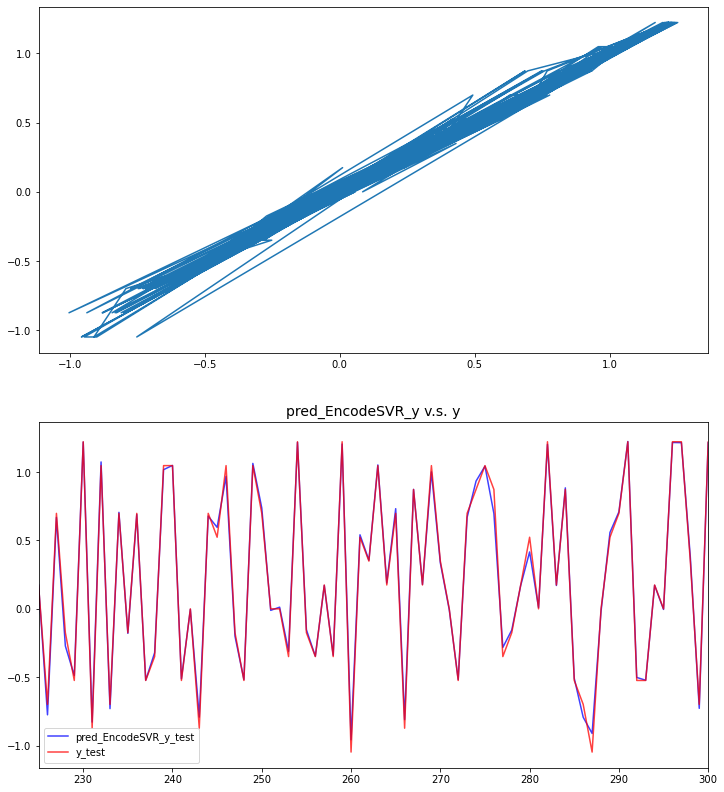

In [60]:
fig ,ax_lst = plt.subplots(2, 1,figsize=(12,14))
ax_lst[0].plot(pred_EncodeSVR_y_test, y_test)
ax_lst[1].plot([i for i in range(pred_EncodeSVR_y_test.shape[0])], list(pred_EncodeSVR_y_test), color='b', alpha=0.75, label='pred_EncodeSVR_y_test')
ax_lst[1].plot(y_test, color='red', alpha=0.75, label='y_test')
ax_lst[1].set_title(f"pred_EncodeSVR_y v.s. y",fontsize=14)
ax_lst[1].grid(False)
ax_lst[1].legend(loc='best')
ax_lst[1].set_xlim([225, 300])
plt.show()

### Directly apply SVR on Rjk

In [71]:
X_train0, X_test0, y_train0, y_test0 = train_test_split(Xvec, yvec, test_size=0.2, random_state=42)

In [72]:
svr_0 = SVR(kernel='rbf',gamma='scale', C=5.0, epsilon=0.01)
svr_0.fit(X_train0, y_train0)
svr_0.score(X_test0, y_test0)

0.9805435035638137

In [74]:
pred_SVR0_y_test = svr_0.predict(X_test0)
rmse0 = np.sqrt(mean_squared_error(y_test0, pred_SVR0_y_test))
print("RMSE for SVR0:", rmse0)
print("I.E. %.04f degree of mean error" % (rmse0/math.pi*180))

RMSE for SVR0: 0.08839419630126745
I.E. 5.0646 degree of mean error


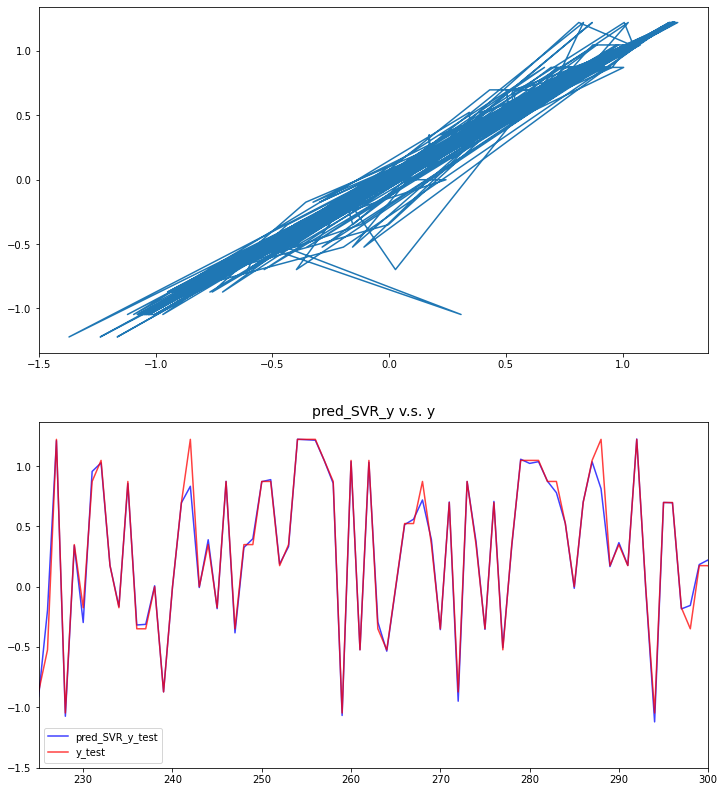

In [75]:
fig0 ,ax_lst0 = plt.subplots(2, 1,figsize=(12,14))
ax_lst0[0].plot(pred_SVR0_y_test, y_test0)
ax_lst0[1].plot([i for i in range(pred_SVR0_y_test.shape[0])], list(pred_SVR0_y_test), color='b', alpha=0.75, label='pred_SVR_y_test')
ax_lst0[1].plot(y_test0, color='red', alpha=0.75, label='y_test')
ax_lst0[1].set_title(f"pred_SVR_y v.s. y",fontsize=14)
ax_lst0[1].grid(False)
ax_lst0[1].legend(loc='best')
ax_lst0[1].set_xlim([225, 300])
plt.show()